# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [167]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [168]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [169]:
import matplotlib.pyplot as plt

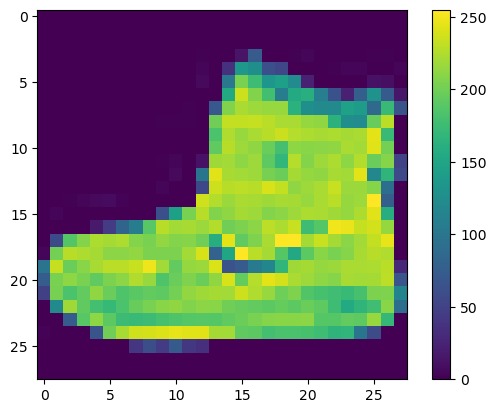

In [170]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [171]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [172]:
X_train = X_train[...,None]
X_test = X_test[...,None]

In [173]:
X_train.shape

(60000, 28, 28, 1)

In [174]:
X_test.shape

(10000, 28, 28, 1)

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [175]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

**Преобразуйте  y_train и y_test в one_hot представления **

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [176]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(4,4)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [177]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [178]:
model.build((None,28,28,1))

In [179]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               589952    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [181]:
history = model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4016 - accuracy: 0.8571
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2729 - accuracy: 0.9002
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2257 - accuracy: 0.9174
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1893 - accuracy: 0.9311
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1641 - accuracy: 0.9409
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1415 - accuracy: 0.9496
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1214 - accuracy: 0.9558
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1072 - accuracy: 0.9616
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0931 - accuracy: 0.9663
Epoch 10/10
1875/1875 [==============================] - 19s 10ms

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [190]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 1s 3ms/step


In [191]:
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       1.00      0.95      0.97      1000
           2       0.93      0.67      0.78      1000
           3       0.86      0.93      0.89      1000
           4       0.71      0.92      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.69      0.71      1000
           7       0.91      0.99      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.99      0.92      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

In [209]:
from tensorflow.keras import models

In [221]:
activation_model = keras.Model(inputs=model.input,
                         outputs=model.layers[0].output)

In [222]:
acts = activation_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


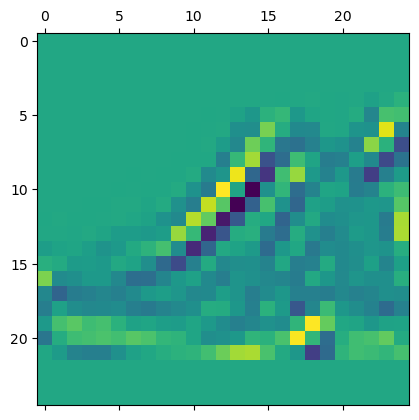

In [230]:
plt.matshow(acts[0, :, :, 0], cmap='viridis')

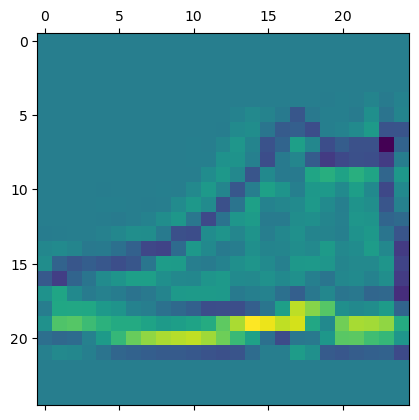

In [231]:
plt.matshow(acts[0, :, :, -1], cmap='viridis')

In [232]:
images_per_row = 16
n_filters = acts.shape[-1]
size = acts.shape[1]
n_cols = n_filters // images_per_row
display_grid = np.zeros((size * n_cols,images_per_row*size))


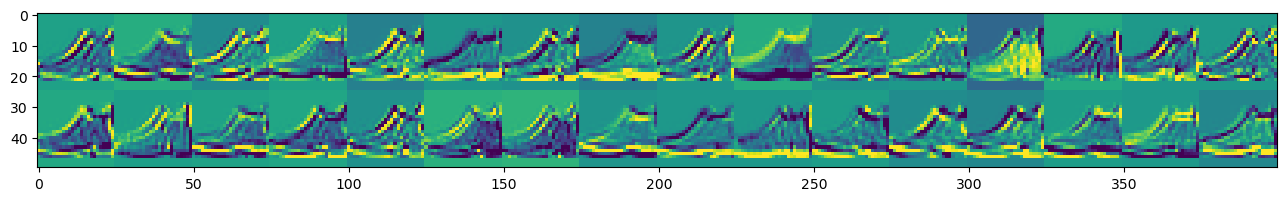

In [241]:
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = acts[0, :, :, col*images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image,0,255).astype('uint8')
        display_grid[col * size: (col+1) * size, row * size: (row+1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))     
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()